# Using global variables in modules  

In this example we will use a module `RV` that contains three global variables to store the data: time, rv, and err. `RV` contains functions for the user to set these globals as well as a simple example function to fit the data. The file is displayed below:

In [1]:
;more RV.jl

module RV

using LsqFit

#include("types.jl")

global time = nothing
global rv = nothing
global err = nothing

function set_time(val)
   global time
   time = val
   println("Set RV.time")
end

function set_rv(val)
   global rv
   rv = val
   println("Set RV.rv")
end

function set_err(val)
   global err
   err = val
   println("Set RV.err")
end

function fit()
  function func(x, p::Vector)
    return p[1] .* cos(x)
  end
  global time
  global rv
  global err
  if RV.time == nothing
    println("You must set RV time grid using RV.set_time()")
  end
  if RV.rv == nothing
    println("You must set RV data using RV.set_rv()")
  end
  if RV.err == nothing
    println("You must set RV error using RV.set_err()")
  end
  if time != nothing && rv != nothing && err != nothing
    best = curve_fit(func, time, rv, 1.0./err.^2.,[90.0])
    return best
  end
end

end


In [2]:
push!(LOAD_PATH, ".")

using RV

In [3]:
using PyPlot

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Let's jump right in and try to fit.

In [4]:
RV.fit()

You must set RV time grid using RV.set_time()
You must set RV data using RV.set_rv()
You must set RV error using RV.set_err()


Ok, good. We must load in our specific data. Let's generate some fake Radial Velocity data, and use the set functions to change the global variables in the RV module.

In [5]:
Amp = 200.0
err = 10.0 .* randn(100);

In [6]:
RV.set_time(collect(linspace(1., 100., 100)));

Set RV.time


In [7]:
RV.set_rv((Amp .* cos(RV.time)).+ 2.0.*err);

Set RV.rv


In [8]:
RV.set_err(abs(err));

Set RV.err


Now we can perform the fit.

In [9]:
fit = RV.fit();
best_Amp = fit.param[1]

199.14683772863856

In [10]:
println("True Amplitude: $Amp")
println("Derived Amplitude: $best_Amp")

True Amplitude: 200.0
Derived Amplitude: 199.14683772863856


Finally, we can plot the best fit against the data

In [11]:
time_der = collect(linspace(1., 100., 1000));
rv_der = best_Amp .* cos(time_der);

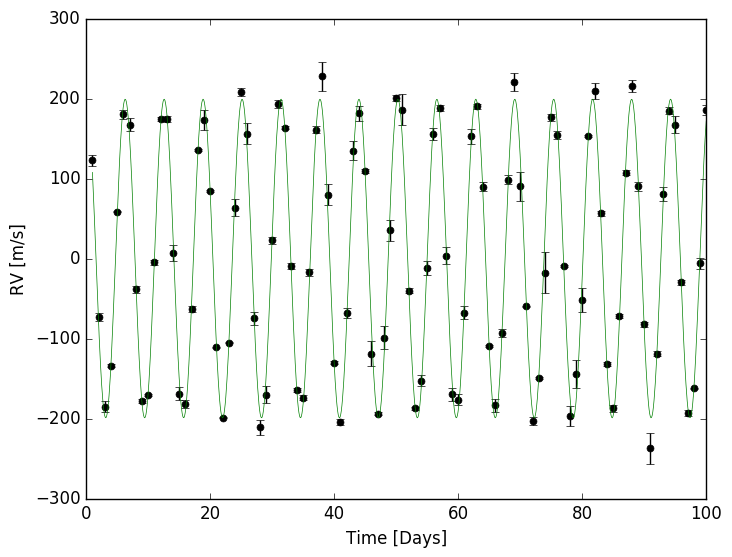

PyObject <matplotlib.text.Text object at 0x32258f890>

In [12]:
errorbar(RV.time, RV.rv, yerr=RV.err, ms=5, fmt="o", c="k")
plot(time_der, rv_der, c="green", lw=0.5, ls="-")
xlabel("Time [Days]")
ylabel("RV [m/s]")